      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
area: 0.462
bathrooms: 0.154
airconditioning_yes: 0.057
bedrooms: 0.048
furnishingstatus_unfurnishe

/opt/miniconda3/envs/spark_scikit/lib/python3.12/site-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/miniconda3/envs/spark_scikit/lib/python3.12/site-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/miniconda3/envs/spark_scikit/lib/python3.12/site-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/miniconda3/envs/spark_scikit/lib/python3.12/site-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(
/opt/miniconda3/envs/spark_scikit/lib/python3.12/site-packages/sklearn/utils/validation.py:877: UserWarning: pandas.DataFrame with sparse column

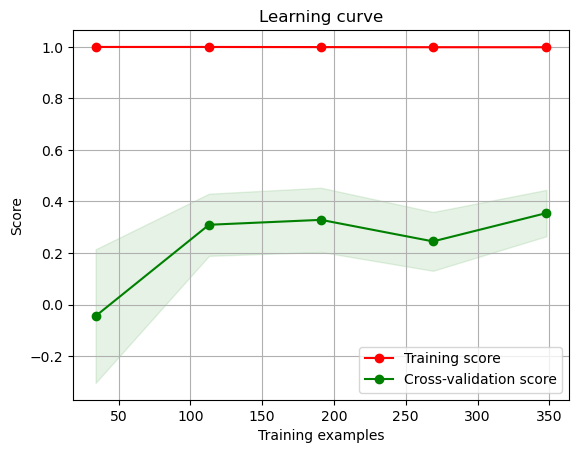

In [23]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

RANDOM_STATE = 87

# load data
def load_housing_data(file_path):
    return pd.read_csv(file_path)

FILE_PATH = "/Users/pepijnschouten/Desktop/Python_Scripts/" \
    "Python_Scripts_Books/Distributed_ML_with_PySpark/" \
        "Python_Own_Files/Chapter 4/data/Housing.csv"
pandas_df = load_housing_data(FILE_PATH)
print(pandas_df.head())

# split in features and labels
X = pandas_df.drop("price", axis=1)
y = pandas_df["price"]

# data preparation
cat_cols = ["mainroad", "guestroom",
            "basement", "hotwaterheating",
            "airconditioning", "prefarea",
            "furnishingstatus"]
one_hot_encoder = OneHotEncoder()
X_encoded = one_hot_encoder.fit_transform(X[cat_cols])
X_encoder_df = pd.DataFrame.sparse.from_spmatrix(
    X_encoded, columns=one_hot_encoder.get_feature_names_out(cat_cols))
X = X.drop(cat_cols, axis=1)
X = pd.concat([X, X_encoder_df], axis=1)

# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE)

# model training
scikit_model = DecisionTreeRegressor(random_state=RANDOM_STATE)
scikit_model.fit(X_train, y_train)

# predictions
y_pred = scikit_model.predict(X_test)

# evaluation
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print some metrics and info
# feature importances
importances = scikit_model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
for i in indices:   
    print(f"{feature_names[i]}: {importances[i]:.3f}")

# compare true and predicted values
results_df = pd.DataFrame(
    {"Price": y_test, "Prediction": y_pred})
print("\n", results_df.head(10))

# rmse and r2
print("\n", f"RMSE: {rmse}", f"R2: {r2}")

# overfitting
y_train_pred = scikit_model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)
print("\n", f"R2 train: {r2_train}")

# plot learning curve
def plot_learning_curve(estimator, title, X, y,
                        ylim=None, cv=None, n_jobs=None,
                        train_sizes=np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")  
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()

plot_learning_curve(scikit_model,
                    "Learning curve",
                    X_train, y_train,
                    cv=5)
 

